# Creating BDT input pkls from input ntuples

as well as the final pkls for use in the main analysis.

The purpose of this notebooke was to see if the updated NuMI flux ntuples could be ported into the main analysis body, and the effect this would have.

In [1]:
# So that the notebook us updated to reflect changes in the .py file:
%load_ext autoreload
%autoreload 2
from create_sig_pkls import * # .py file used to define most functions

Sample POT: 4.641e+22


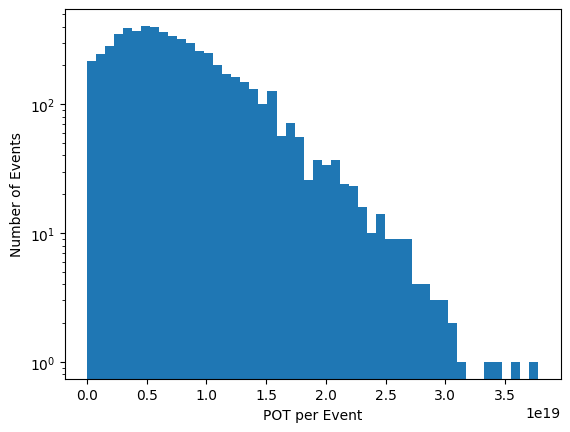

In [2]:
# Parameters to set so that files are saved/imported correctly
run = 'Run3' # Currently only Run3 ntuple
sample = 'Signal' # 'Data', 'Signal', 'Overlay', 'Dirt', 'EXT'

# Defining the pkl save path
loc_BDT_input = '/exp/uboone/data/users/jbateman/workdir/HPS_uboone_analysis/NewFlux/BDT_input_pkl/'

# Import the ntuples you want to process and produce pkls for.
# Currently using a copy of the update NuMI flux pelee sample
loc_ntuple = '/exp/uboone/data/users/jbateman/workdir/HPS_uboone_analysis/Final_v51_FHC/' 
# loc_ntuple  = '/exp/uboone/data/users/kmistry/work/MCC9/searchingfornues/ntuple_files_detvar_newtune/run3/' # Old detvar location   


ntuple_name = 'sfn_numi_fhc_generic_150_ppfx_CV_train.root'  # filename_root+name_extention

# Alternative path - using patricks origanl copy
ntuple_path = '/exp/uboone/data/users/pgreen/standard_pelee_ntuples/alternative_flux_g4.10.4/numi_nu_pelee_ntuples_run3_rhc_g4.10.4_full.root'

remake_pkl = True # If True, will remake the background pkl file. 
if remake_pkl:
    
    root_tree = uproot.open(loc_ntuple + ntuple_name)['nuselection']
    # Retrieving the POT information from the SubRun tree
    pot_df = root_tree['SubRun'].arrays(library='pd')

    root_tree = root_tree['NeutrinoSelectionFilter']

    print('Sample POT: {:.4}'.format(sum(pot_df['pot'])))

    plt.hist(pot_df['pot'], bins=50)

    plt.yscale('log')
    plt.xlabel('POT per Event')
    plt.ylabel('Number of Events')
    plt.show()

    additional_variables = mc_variables+weights_variables
    
    # Option to add extra variables to main/additional arrays, based on the sample type.
    if sample == 'Overlay':
        Main_variables += ["ppfx_cv"]
    
    df_main_vars = root_tree.arrays(Main_variables, library='pd') # Cannot do main & weights/MC vars combined, as weights & MC can't be flattened!


In [5]:
root_tree.keys()

['selected',
 'run',
 'sub',
 'evt',
 'trk_id',
 'shr_id',
 'trk2_id',
 'shr2_id',
 'shr_energy_tot',
 'shr_energy',
 'shr_energy_tot_cali',
 'shr_energy_cali',
 'shr_theta',
 'shr_phi',
 'shr_pca_0',
 'shr_pca_1',
 'shr_pca_2',
 'shr_px',
 'shr_py',
 'shr_pz',
 'shr_openangle',
 'shr_tkfit_start_x',
 'shr_tkfit_start_y',
 'shr_tkfit_start_z',
 'shr_tkfit_theta',
 'shr_tkfit_phi',
 'shr_start_x',
 'shr_start_y',
 'shr_start_z',
 'shr_dedx_Y',
 'shr_dedx_V',
 'shr_dedx_U',
 'shr_dedx_Y_cali',
 'shr_dedx_V_cali',
 'shr_dedx_U_cali',
 'shr_tkfit_dedx_Y',
 'shr_tkfit_dedx_V',
 'shr_tkfit_dedx_U',
 'shr_tkfit_dedx_max',
 'shr_tkfit_nhits_Y',
 'shr_tkfit_nhits_V',
 'shr_tkfit_nhits_U',
 'shr_llrpid_dedx_Y',
 'shr_llrpid_dedx_V',
 'shr_llrpid_dedx_U',
 'shr_llrpid_dedx',
 'shr_tkfit_dedx_Y_alt',
 'shr_tkfit_dedx_V_alt',
 'shr_tkfit_dedx_U_alt',
 'shr_tkfit_nhits_Y_alt',
 'shr_tkfit_nhits_V_alt',
 'shr_tkfit_nhits_U_alt',
 'trkfit',
 'shr_tkfit_npoints',
 'shr_tkfit_npointsvalid',
 'shr_trkfit